# Hands On Signal Processing with Python

URL: https://towardsdatascience.com/hands-on-signal-processing-with-python-9bda8aad39de

## Hands-On Examples

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy import signal
import pywt

Data URL: [Kaggle - Hourly Energy Consumption](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption?)

### Data Preprocessing

Text(0, 0.5, 'MW Energy Consumption')

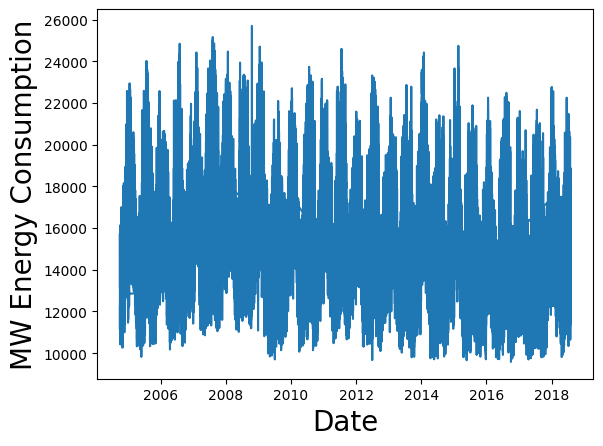

In [10]:
data_fft = pd.read_csv('data/hourly-energy-consumption/AEP_hourly.csv')
y = np.array(data_fft.AEP_MW)
x = data_fft.index
date_array = pd.to_datetime(data_fft.Datetime)
plt.plot(date_array,y)
plt.xlabel('Date',fontsize=20)
plt.ylabel('MW Energy Consumption',fontsize=20)

Text(0, 0.5, 'Temperature')

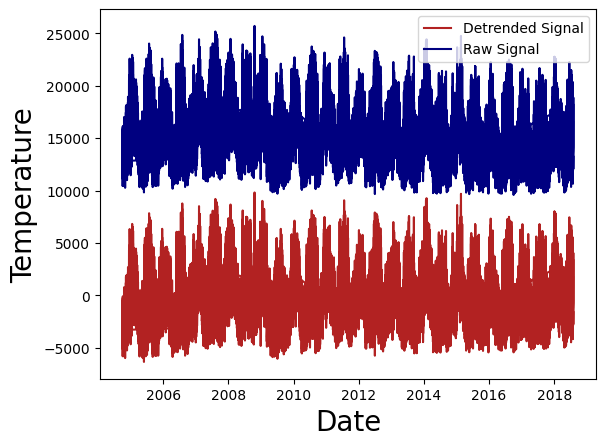

In [11]:
y_detrend = signal.detrend(y)
plt.plot(date_array, y_detrend,color='firebrick',label='Detrended Signal')
plt.plot(date_array,y, color='navy',label='Raw Signal')
plt.legend()
plt.xlabel('Date',fontsize=20)
plt.ylabel('Temperature',fontsize=20)

### Frequency Analysis

(0.0, 200.0)

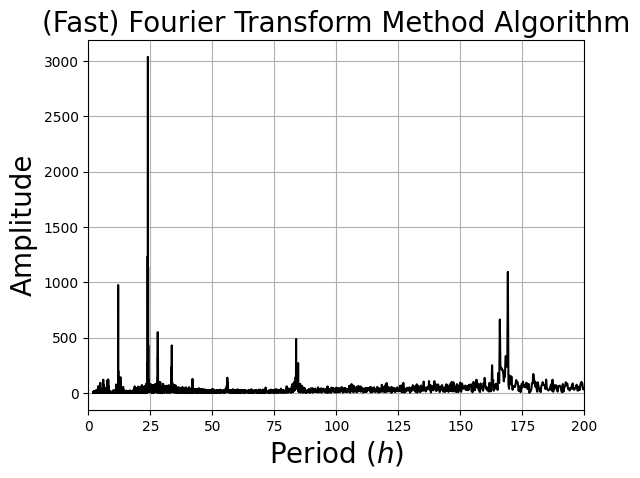

In [12]:
FFT =np.fft.fft(y_detrend)
new_N=int(len(FFT)/2) 
f_nat=1
new_X = np.linspace(10**-12, f_nat/2, new_N, endpoint=True)
new_Xph=1.0/(new_X)
FFT_abs=np.abs(FFT)
plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='black')
plt.xlabel('Period ($h$)',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.title('(Fast) Fourier Transform Method Algorithm',fontsize=20)
plt.grid(True)
plt.xlim(0,200)

In [13]:
fft_abs = 2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph)
fft_abs = pd.DataFrame(fft_abs, columns = ['Amplitude'])
fft_sorted = fft_abs.sort_values(by='Amplitude',ascending=False).head(20)
fft_sorted

,Amplitude
5054,3037.558970
28,2556.509851
27,1636.961921
5068,1235.815611
5040,1137.886002
5055,1105.313718
717,1094.463940
10108,975.280091
10109,932.572475
14,895.208752


In [14]:
fft_sorted.index/24

Float64Index([ 210.58333333333334,  1.1666666666666667,               1.125,
               211.16666666666666,               210.0,             210.625,
                           29.875,   421.1666666666667,   421.2083333333333,
               0.5833333333333334,  1.0833333333333333,  210.54166666666666,
               1.0416666666666667,  30.458333333333332,  210.04166666666666,
               180.70833333333334,             421.125,  209.95833333333334,
               60.333333333333336, 0.16666666666666666],
             dtype='float64')

### Noise Filtering (Fourier Transform)

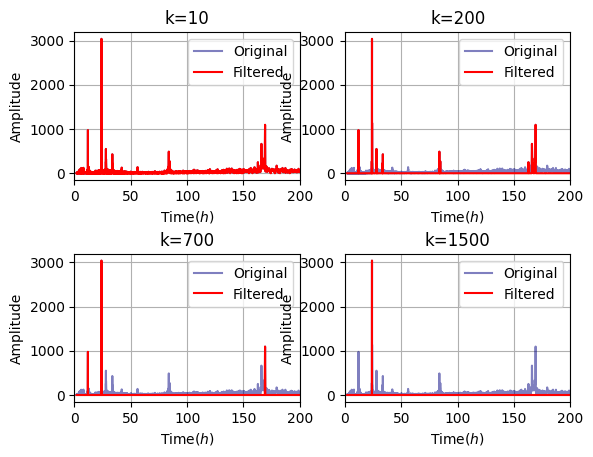

In [15]:
#Defining the filtering function
def fft_filter(th):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

#Showing the plots at different thresholds values
#Defining the amplitude filtering function
def fft_filter_amp(th):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

K_plot=[10,200,700,1500]
j=0
for k in K_plot:
    j=j+1
    plt.subplot(2,2,j)
    plt.title('k=%i'%(k))
    plt.xlim(0,200)
    plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='navy',alpha=0.5,label='Original')
    plt.grid(True)
    plt.plot(new_Xph,fft_filter_amp(k),'red',label='Filtered')
    plt.xlabel('Time($h$)')
    plt.ylabel('Amplitude')
    plt.legend()
plt.subplots_adjust(hspace=0.5)

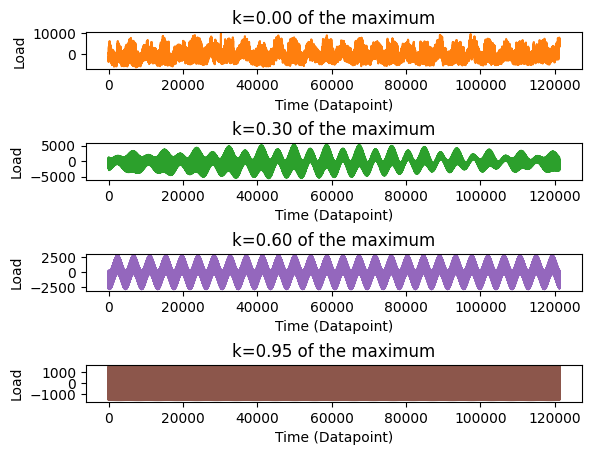

In [33]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:purple", "tab:brown", "tab:olive"]

def fft_filter(perc):
    th=perc*(2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph)).max()
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

#Showing some plots at different threshold values
K_plot_values=[0.0,0.30,0.60,0.95]
j=0
for k in K_plot_values:
    j+=1
    plt.subplot(4,1,j)
    plt.plot(x,np.fft.ifft(fft_filter(k)),color=colors[j])
    plt.title('k=%.2f of the maximum' %(k))
    plt.xlabel('Time (Datapoint)')
    plt.ylabel('Load')
plt.subplots_adjust(hspace=2.0)

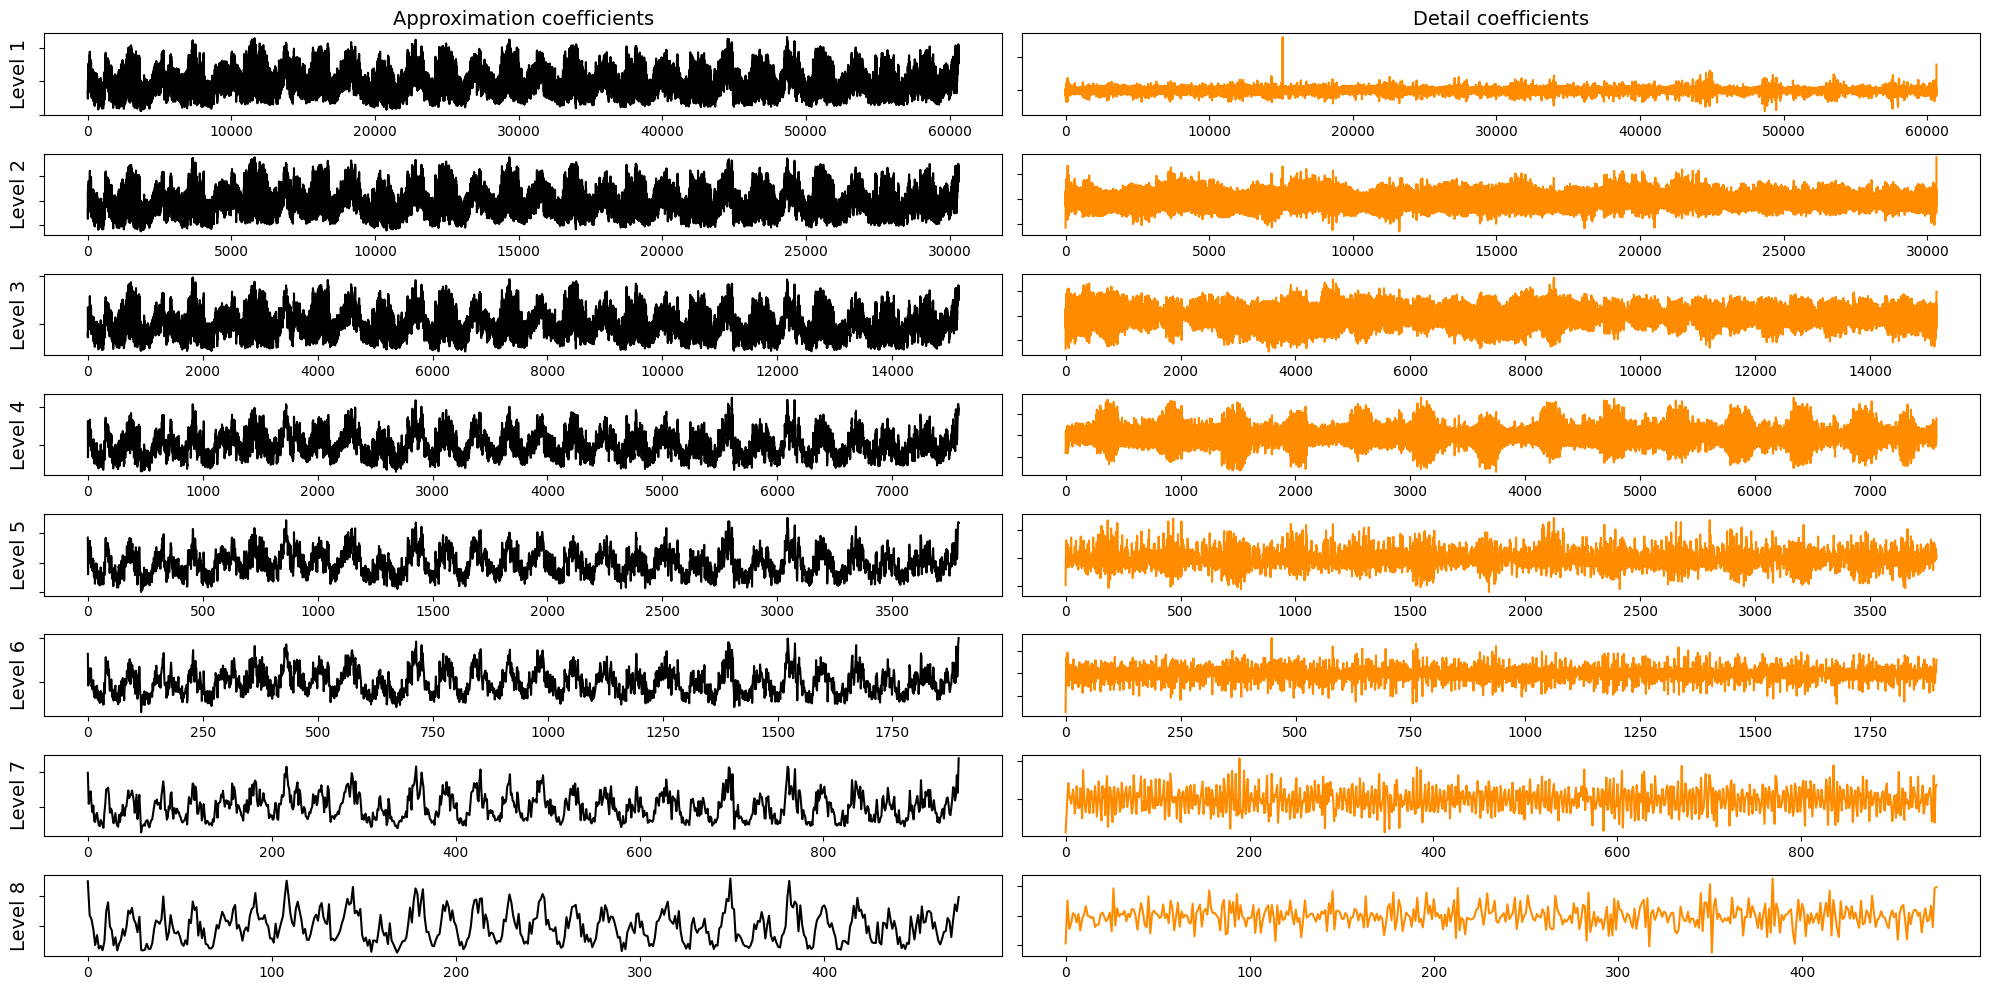

In [34]:
time=x.max()
sample_rate=1/900.
size= int(sample_rate*time)
t = np.linspace(0, time, num=size)
dataset = y_detrend
waveletname = 'sym2'
levels=8
fig, axarr = plt.subplots(nrows=levels, ncols=2, figsize=(20,10))
COEFF_D=[]
DATASET=[]
k=1
for ii in range(levels):
    (dataset, coeff_d) = pywt.dwt(dataset, waveletname,mode='per')
    axarr[ii, 0].plot(dataset, 'black')
    axarr[ii, 1].plot(coeff_d, 'darkorange')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
    #print(len(coeff_d))
    COEFF_D.append(np.repeat(coeff_d,2**k))
    DATASET.append(np.repeat(dataset,2**k))
    k=k+1
plt.tight_layout()
plt.show()